In [20]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# 1.	Find and treat all the missing values. Rows or columns with missing values must not be dropped.

In [21]:
with open('Dataset_Day4.csv','r') as f:
    data=pd.read_csv(f)
    
#printing the misisng values
missing_values=data.isna().sum()
print(missing_values)

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      1
Final         3
dtype: int64


In [45]:
#imputing missing values
data["TakeHome"].fillna(data["TakeHome"].median(), inplace = True)
data["Final"].fillna(data["Final"].median(), inplace = True)

In [46]:
data.isna().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      0
Final         0
dtype: int64

# 2.	Make an in-depth report on the variables using descriptive statistics and also portray the relationship between each variables using visualizations.

In [39]:
stats = data.describe()
print("Descriptive Statistics:\n", stats)

Descriptive Statistics:
           Prefix  Assignment    Tutorial     Midterm    TakeHome       Final
count  99.000000   99.000000   99.000000   99.000000   99.000000   99.000000
mean    7.313131   85.491717   89.731111   68.049495   80.828469   68.414375
std     0.932918   12.597694   15.071556   19.376074   23.687021   18.511079
min     4.000000   28.140000   34.090000   28.120000   16.910000   28.060000
25%     7.000000   80.875000   83.350000   52.810000   67.960000   54.165000
50%     8.000000   89.940000   93.100000   69.380000   87.960000   66.670000
75%     8.000000   95.000000  100.550000   82.810000   98.425000   83.610000
max     8.000000  100.830000  112.580000  110.000000  108.890000  108.890000


# visualise realtionship between each variable


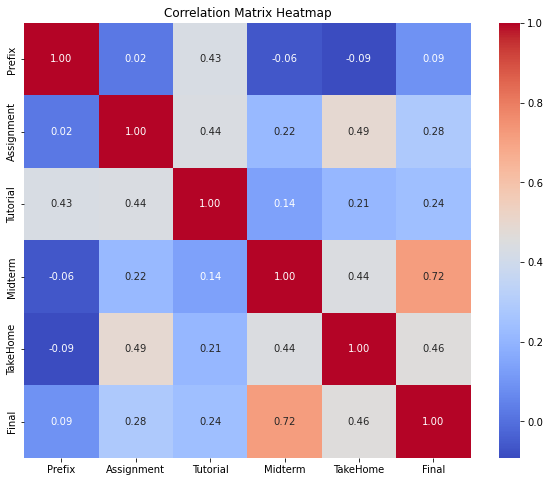

In [44]:
#heatmap

correlation_matrix=data.corr()
plt.figure(figsize = (10,8)) 
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt='.2f') 
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# the diagonal cell have value 1.00 , each factor is perfectly correlated with itself
# prefix and final have positive correlation
# prefix and midterm & prefix and takehome have negative correlation
# tutorial performance might be linked to assignment performance.
# TakeHome and Final exams show moderate positive correlations with each other, implying that performance in one might be indicative of performance in the other.

<AxesSubplot:>

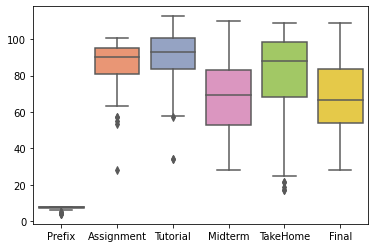

In [49]:
#boxplot
ColumnsToVisualize=data.select_dtypes(include=['float64','int64']).columns
sns.boxplot(data=data[ColumnsToVisualize],orient="v",palette = "Set2")

positively skewed:- prefix ( nearly clustered around 0, suggesting higher values)
                    midterm (closer to lower quartile, suggesting higher values)
                    
negatively_skewed:- tutorial (closer to the upper quartile, suggesting lower values)  